# PRACTICA 4 FAA: ALGORITMO GENETICO

## Explicación parametros de entrada del Clasificador Genetico

- **numPopulation**: Número de la población que habrá a lo largo del algoritmo. Valor por defecto 50.
- **epoaches**: Número de rondas en el que se aplicará el crossover, las mutaciones, etc. Valor por defecto 50.
- **numRules**: Número de reglas que va a tener como máximo cada individuo de la población. Valor por defecto 5.
- **elit_prob**: Porcentaje de la población que tomaremos como elite (mejores de la población). Valor por defecto 0,05 (5%).
- **cross_prob**: Porcentaje de que dos padres generen descendientes, en caso de no cumplirse, los padres se volveran descendientes. Valor por defecto 0,02 (2%).
- **mutation_prob**: Porcentaje de que un descendiente mute con respecto al numero de reglas, en caso de no cumplirse, no muta. Valor por defecto 0,05 (5%).
- **bitmut_prob**: Porcentaje de que un descendiente mute con respecto al a bits de una regla, en caso de no cumplirse, no muta. Valor por defecto 0,15 (15%).
- **math_related_prediction**: Booleano que indica que el problema es relacionado con matematicas, por lo que cogemos el individuo con mejor fitness, en caso de no serlo, la prediccion será la predicción media de los elites. Normalmente, dando igual el problema, la predicción se calcula mejor media con la flag a True. Valor por defecto True.
- **debug_rules**: Muestra por la terminal de salida el/los elite(s) seleccionado(s) para predecir y su tasa de acierto en el entrenamiento. Valor por defecto False.
- **debug_fitness**: Guarda el fitness del mejor individuo y la media de los fitness de todos los individuos. Valor por defecto False.


## Apartado 1

### Mecanismo de cruce

El mecanismo de cruce incluye el intra y el inter. En caso de que se cumpla la condicion de **cross_prob**, se elegirá al azar entre estos dos tipos con el mismo procentaje de ocurrir para cada uno, nunca ocurrirán ambos a la vez.

- Intra: obtenemos una regla aleatoria entre la de los padres y a continuación elegimos un punto de corte para la regla seleccionada. Tras ello creamos dos descendientes con las mutaciones en las reglas.

```
cross_point = random.randint(0, len(padre1[0])-1)
elected_rule = random.randint(0, min(len(padre1), len(padre2))-1)

#split a random rule from padre1 and padre2
aux_rule = padre1[elected_rule][:cross_point] + padre2[elected_rule][cross_point:]
padre1[elected_rule] = aux_rule
descendents.append(padre1)

aux_rule = padre2[elected_rule][:cross_point] + padre1[elected_rule][cross_point:]
padre2[elected_rule] = aux_rule
descendents.append(padre2)
```

- Inter: obtenemos una posició aleatoria entre las reglas de los padres y hacemos un "swap" entre estas para crear dos descendientes.

```
cross_point = random.randint(0, self.numRules-1)

descendents.append(padre1[:cross_point] + padre2[cross_point:])
descendents.append(padre2[:cross_point] + padre1[cross_point:])
```

### Mecanismo de mutación

El mecanismo de mutación incluye mutación con respecto al numero de reglas y mutación de bit de reglas. El porcentaje de que ocurra cualquiera de ellos viene dado por **mutation_prob** y **bitmut_prob** respectivamente.

- Mutación numero de reglas: Se le añadirá o eliminará una regla al individuo completamente aleatoria, teniendo el cuenta no añadir mas de **numReglas** a un individuo o eliminar todas sus reglas.

```
if random.random() < self.mutation_prob:
    if random.random() < 0.5 and len(individuo) < self.numRules:    #add rule
        rule = []
        while sum(rule) == 0:
            rule = self.__generate_rule(diccionario)
        individuo.append(rule)
    elif len(individuo) > 2:                                        #remove rule
        individuo.pop(np.random.choice(len(individuo)))
```

- Mutación de bit: Se le modificará el bit a un "trozo" de la regla para asi crear una nueva.

```
for regla in individuo:
    indexBegin = 0
    indexEnd = 0
    for key in diccionario.keys():
        lenkeys = len(list(diccionario[key].keys()))
        indexEnd += lenkeys

        if random.random() < self.bitmut_prob:
            i = random.randint(indexBegin, indexEnd - 1)
            for j in range(indexBegin, indexEnd):
                regla[j] = 0
            regla[i] = 1

        indexBegin = indexEnd
```

## Apartado 2

In [14]:
from ClasificadorGenetico import ClasificadorGenetico
from Clasificador import Clasificador
from Datos import Datos
import EstrategiaParticionado
import matplotlib.pyplot as plt

clasificador = Clasificador()
dataset_xor=Datos('./datasets/xor.csv')
dataset_titanic=Datos('./datasets/titanic.csv')

### Media de errores para el dataset XOR

In [2]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 0.2)
clasificador = Clasificador()

for population in [50,100]:
    for epoches in [50, 100]:
        print("="*20, f"Numero poblacion: {population}, Numero epocas: {epoches}", "="*20)
        cg = ClasificadorGenetico(numPopulation=population, epoches=epoches, debug_rules=True)
        errores1 = clasificador.validacion(estrategia, dataset_xor, cg, None)
        media = sum(errores1) / len(errores1)
        print(f"Media de errores para {population} individuos y {epoches} generaciones: " + str(media))

==================== Numero poblacion: 50, Numero epocas: 50 ====================
-Elegido para clasificar-> [[0, 1, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 1, 0]] 
-Porcentaje de aciertos -> 1.0
-Elegido para clasificar-> [[0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0]] 
-Porcentaje de aciertos -> 1.0
-Elegido para clasificar-> [[0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1]] 
-Porcentaje de aciertos -> 1.0
-Elegido para clasificar-> [[1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 0], [1, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 1]] 
-Porcentaje de aciertos -> 1.0
-Elegido para clasificar-> [[1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1]] 
-Porcentaje de aciertos -> 1.0
Media de errores para 50 individuos y 50 generaciones: 0.0
==================== Numero poblacion: 50, Numero epocas: 100 ====================
-Elegido para cl

Como podemos observar, debido a que el dataset xor poseo pocas columnas y estas solo pueden tener dos valores distintos, con 5 reglas es bastante sencillo encontrar un individuo que sea "perfecto".

### Media de errores para el dataset TITANIC

In [3]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 0.2)
clasificador = Clasificador()

for population in [50,100]:
    for epoches in [50, 100]:
        print("="*20, f"Numero poblacion: {population}, Numero epocas: {epoches}", "="*20)
        cg = ClasificadorGenetico(numPopulation=population, epoches=epoches, debug_rules=True)
        errores1 = clasificador.validacion(estrategia, dataset_titanic, cg, None)
        media = sum(errores1) / len(errores1)
        print(f"Media de errores para {population} individuos y {epoches} generaciones: " + str(media))

==================== Numero poblacion: 50, Numero epocas: 50 ====================
-Elegido para clasificar-> [[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] 
-Porcentaje de aciertos -> 0.7849462365591398
-Elegido para clasificar-> [[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]] 
-Porcentaje de aciertos -> 0.7765830346475507
-Elegido para clasificar-> [[1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Como podemos observar, la variación es mínima, esto se debe a que a pesar de realizar varias generaciones el factor clave es el número de reglas. Esto es porque las reglas son considerablemente largas en este dataset y le resulta complicado al algoritmo genético subir el porcentaje ya que el factor clave es el número de reglas.

Las reglas está compuesto de "genes", que son los elementos básicos de la cadena y al conjuntos de "genes" forman un "cromosoma".

## Apartado 3

In [4]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 0.2)
clasificador = Clasificador()

for numRules in [1, 2, 3, 4, 5]:
    cg = ClasificadorGenetico(numRules=numRules)
    errores1 = clasificador.validacion(estrategia, dataset_xor, cg, None)
    media = sum(errores1) / len(errores1)
    print(f"Media de errores para {numRules} reglas: " + str(media))

Media de errores para 1 reglas: 0.7924999999999999
Media de errores para 2 reglas: 0.5574999999999999
Media de errores para 3 reglas: 0.28750000000000003
Media de errores para 4 reglas: 0.11500000000000002
Media de errores para 5 reglas: 0.0


In [5]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 0.2)
clasificador = Clasificador()

for numRules in [1, 2, 3, 4, 5]:
    cg = ClasificadorGenetico(numRules=numRules)
    errores1 = clasificador.validacion(estrategia, dataset_titanic, cg, None)
    media = sum(errores1) / len(errores1)
    print(f"Media de errores para {numRules} reglas: " + str(media))

Media de errores para 1 reglas: 0.5043062200956937
Media de errores para 2 reglas: 0.24210526315789477
Media de errores para 3 reglas: 0.23923444976076555
Media de errores para 4 reglas: 0.23923444976076555
Media de errores para 5 reglas: 0.23253588516746415


Como hemos podido observar es muy importante el número de reglas para la predicción, más que el número de generaciones o el número de la población cuando estos últimos tienden a números altos.

## Apartado 4

Media de errores: 0.0


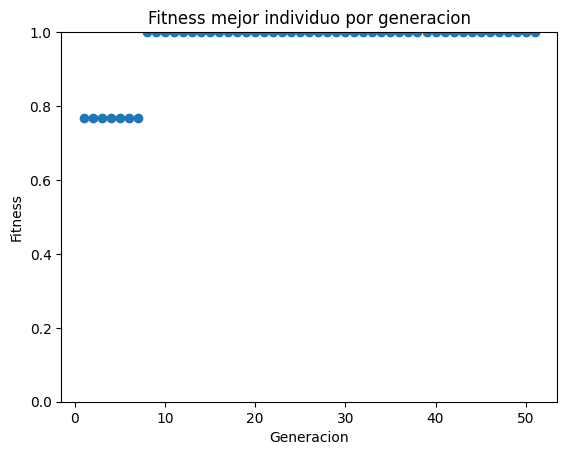

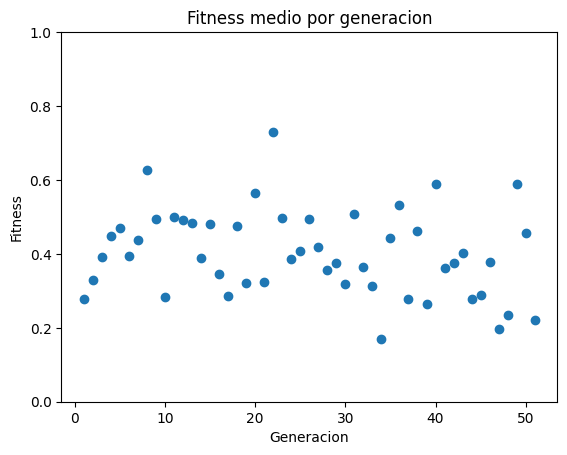

In [16]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 0.2)
clasificador = Clasificador()

cg = ClasificadorGenetico(debug_fitness=True)
errores1 = clasificador.validacion(estrategia, dataset_xor, cg, None)
media = sum(errores1) / len(errores1)
print(f"Media de errores: " + str(media))

max_fitnesses, avg_fitnesses = zip(*cg.debug_fitness_list)

max_fitnesses = list(max_fitnesses)
avg_fitnesses = list(avg_fitnesses)

x = [i for i in range(1, len(max_fitnesses)+1)]

plt.scatter(x,max_fitnesses)

plt.ylim(0, 1)

plt.title("Fitness mejor individuo por generacion")
plt.xlabel("Generacion")
plt.ylabel("Fitness")

plt.show()

plt.scatter(x,avg_fitnesses)

plt.ylim(0, 1)

plt.title("Fitness medio por generacion")
plt.xlabel("Generacion")
plt.ylabel("Fitness")

plt.show()

Media de errores: 0.20669856459330144


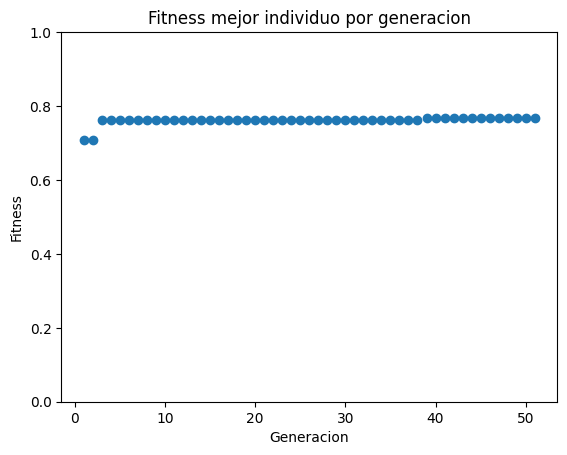

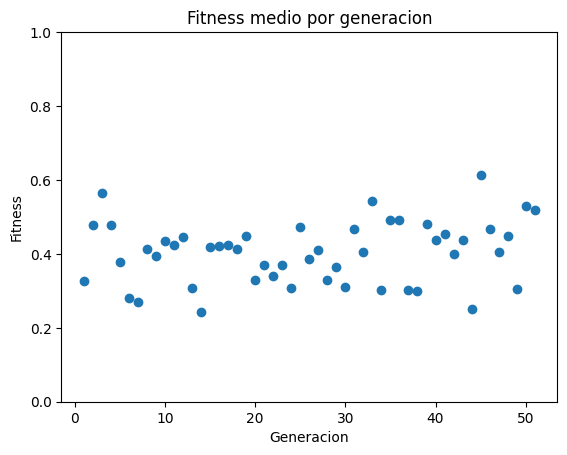

In [17]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 0.2)
clasificador = Clasificador()

cg = ClasificadorGenetico(debug_fitness=True)
errores1 = clasificador.validacion(estrategia, dataset_titanic, cg, None)
media = sum(errores1) / len(errores1)
print(f"Media de errores: " + str(media))

max_fitnesses, avg_fitnesses = zip(*cg.debug_fitness_list)

max_fitnesses = list(max_fitnesses)
avg_fitnesses = list(avg_fitnesses)

x = [i for i in range(1, len(max_fitnesses)+1)]

plt.scatter(x,max_fitnesses)

plt.ylim(0, 1)

plt.title("Fitness mejor individuo por generacion")
plt.xlabel("Generacion")
plt.ylabel("Fitness")

plt.show()

plt.scatter(x,avg_fitnesses)

plt.ylim(0, 1)

plt.title("Fitness medio por generacion")
plt.xlabel("Generacion")
plt.ylabel("Fitness")

plt.show()